<a href="https://colab.research.google.com/github/K-Egbetokun/Hamoye-quiz-Answers/blob/master/Kehinde_Egbetokun_Stage_E_Quiz_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
ts = pd.read_csv('household_power_consumption (1).txt', sep = ';', low_memory = False, infer_datetime_format=True,\
                 parse_dates={'date_time':[0,1]}, index_col=['date_time'])
ts.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
ts.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
ts.replace('?', np.nan, inplace = True)

In [8]:
for column in ts.select_dtypes(include=['object']).columns:
    if column != 'Time':
        ts[[column]] = ts[[column]].astype('float')
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


**QUESTION 11**

In [11]:
df = ts.copy()
df.fillna(df.mean(), inplace= True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df_daily = df.resample('D').sum()

Text(0, 0.5, 'Power usage')

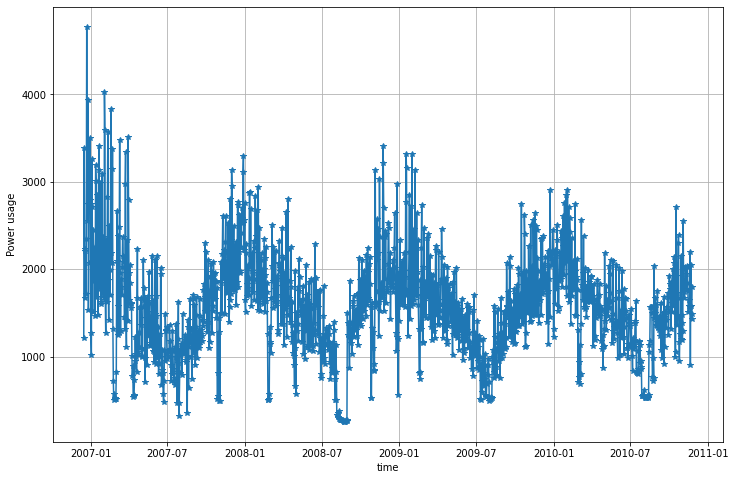

In [14]:
plt.figure(figsize=(12,8))
plt.plot(df_daily.index, df_daily.Global_active_power, marker='*' )
plt.grid()
plt.xlabel('time')
plt.ylabel('Power usage')

**QUESTION 12**

In [15]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Global_active_power, df_daily.Global_reactive_power)
corr

0.04109783735996872

**QUESTION 13**

In [16]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Voltage, df_daily.Global_intensity)
corr

0.052267003605872574

**QUESTION 14**

In [17]:
df_daily.shape

(1442, 7)

In [21]:
from fbprophet import Prophet
df_daily = df_daily.reset_index()

In [22]:
df_daily = df_daily.rename(columns = {'date_time' : 'ds', 'Global_active_power' : 'y'})
df_daily

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [53]:
train, test = df_daily[0:(df_daily.shape[0]-365)], df_daily[(df_daily.shape[0]-365):]
test.shape

(365, 8)

In [28]:
train.iloc[:,:2]

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1072,2009-11-22,2450.976
1073,2009-11-23,1471.122
1074,2009-11-24,2128.856
1075,2009-11-25,1980.130


In [29]:
model = Prophet()
model.fit(train.iloc[:,:2])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = model.make_future_dataframe(periods= 365 , freq= 'D' )
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1651.870476,1841.158045,2984.213925,1651.870476,1651.870476,775.803954,775.803954,775.803954,245.727868,245.727868,245.727868,530.076086,530.076086,530.076086,0.0,0.0,0.0,2427.674430
1,2006-12-17,1651.695654,1847.216994,2985.521773,1651.695654,1651.695654,772.611682,772.611682,772.611682,228.437514,228.437514,228.437514,544.174167,544.174167,544.174167,0.0,0.0,0.0,2424.307336
2,2006-12-18,1651.520833,1533.468043,2549.032076,1651.520833,1651.520833,397.879289,397.879289,397.879289,-161.218418,-161.218418,-161.218418,559.097707,559.097707,559.097707,0.0,0.0,0.0,2049.400122
3,2006-12-19,1651.346012,1621.813397,2742.409985,1651.346012,1651.346012,545.082036,545.082036,545.082036,-29.322660,-29.322660,-29.322660,574.404696,574.404696,574.404696,0.0,0.0,0.0,2196.428047
4,2006-12-20,1651.171190,1648.510201,2798.768663,1651.171190,1651.171190,564.928312,564.928312,564.928312,-24.708936,-24.708936,-24.708936,589.637248,589.637248,589.637248,0.0,0.0,0.0,2216.099502


In [32]:
forecast.shape

(1442, 19)

In [36]:
mape = round((np.sum((np.abs(test.y - forecast.yhat[(forecast.shape[0]-365):]))/ test.y)*100)/365, 2)
mape

20.9

**QUESTION 15**

In [40]:
rmse = round(np.sqrt(np.sum(np.square(test.y - forecast.yhat[(forecast.shape[0]-365):]))/365), 2)
rmse

375.04

**QUESTION 16**

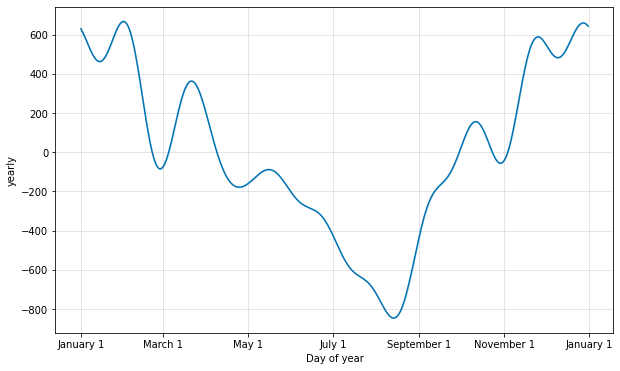

In [63]:
from fbprophet.plot import plot_yearly
plot_yearly(model)

**QUESTION 17**

In [52]:
df_daily = df_daily.rename(columns = {'Global_reactive_power' : 'add1', 'Voltage' : 'add2', 'Global_intensity' : 'add3', 'Sub_metering_1':'add4', 'Sub_metering_2' :'add5', 'Sub_metering_3': 'add6'})
df_daily

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [70]:
train, test = df_daily[0:(df_daily.shape[0]-365)], df_daily[(df_daily.shape[0]-365):]
train

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1072,2009-11-22,2450.976,222.638,347151.89,10358.2,6774.0,411.0,16097.0
1073,2009-11-23,1471.122,148.338,349549.51,6100.8,0.0,402.0,8230.0
1074,2009-11-24,2128.856,153.820,348446.20,8899.0,2491.0,4579.0,9086.0
1075,2009-11-25,1980.130,175.476,347297.45,8309.2,745.0,5083.0,10596.0


In [72]:
model = Prophet()
model.add_regressor(('add1'))
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [87]:
future = model.make_future_dataframe(periods= 365 , freq= 'D' )
future['add1']= df_daily['add1']
future['add2']= df_daily['add2']
future['add3']= df_daily['add3']
future['add4']= df_daily['add4']
future['add5']= df_daily['add5']
future['add6']= df_daily['add6']

In [88]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1566.208205,1159.324915,1191.341470,1566.208205,1566.208205,25.033001,25.033001,25.033001,-72.763302,-72.763302,-72.763302,-356.972861,-356.972861,-356.972861,2.196835,2.196835,2.196835,0.742868,0.742868,0.742868,-5.557483,-5.557483,-5.557483,-391.553789,-391.553789,-391.553789,-407.320943,-407.320943,-407.320943,1.408596,1.408596,1.408596,14.358558,14.358558,14.358558,0.0,0.0,0.0,1174.654416
1,2006-12-17,1566.143627,3400.181560,3431.485177,1566.143627,1566.143627,-9.027243,-9.027243,-9.027243,-0.120897,-0.120897,-0.120897,1839.073287,1839.073287,1839.073287,-0.484864,-0.484864,-0.484864,-1.170809,-1.170809,-1.170809,6.319667,6.319667,6.319667,1849.806679,1849.806679,1849.806679,1834.589141,1834.589141,1834.589141,0.164156,0.164156,0.164156,15.053382,15.053382,15.053382,0.0,0.0,0.0,3415.950306
2,2006-12-18,1566.079050,2189.084916,2220.285662,1566.079050,1566.079050,2.418741,2.418741,2.418741,0.353928,0.353928,0.353928,611.805162,611.805162,611.805162,0.794648,0.794648,0.794648,-0.347734,-0.347734,-0.347734,7.275203,7.275203,7.275203,637.648383,637.648383,637.648383,622.299948,622.299948,622.299948,-0.338153,-0.338153,-0.338153,15.686588,15.686588,15.686588,0.0,0.0,0.0,2203.727433
3,2006-12-19,1566.014473,1663.653843,1695.386633,1566.014473,1566.014473,4.352727,4.352727,4.352727,0.672347,0.672347,0.672347,98.827383,98.827383,98.827383,1.090123,1.090123,1.090123,-2.965703,-2.965703,-2.965703,-3.763561,-3.763561,-3.763561,112.790843,112.790843,112.790843,98.213317,98.213317,98.213317,-1.669783,-1.669783,-1.669783,16.247309,16.247309,16.247309,0.0,0.0,0.0,1678.805316
4,2006-12-20,1565.949895,2207.579344,2241.041631,1565.949895,1565.949895,2.560270,2.560270,2.560270,0.800421,0.800421,0.800421,627.481336,627.481336,627.481336,2.196835,2.196835,2.196835,-0.361925,-0.361925,-0.361925,7.338717,7.338717,7.338717,657.843016,657.843016,657.843016,640.015654,640.015654,640.015654,1.101892,1.101892,1.101892,16.725469,16.725469,16.725469,0.0,0.0,0.0,2223.792911


In [89]:
mape = round((np.sum((np.abs(test.y - forecast.yhat[(forecast.shape[0]-365):]))/ test.y)*100)/365, 2)
mape

2.83

**QUESTION 18**

In [90]:
rmse = round(np.sqrt(np.sum(np.square(test.y - forecast.yhat[(forecast.shape[0]-365):]))/365), 2)
rmse

41.93

**QUESTION 19**

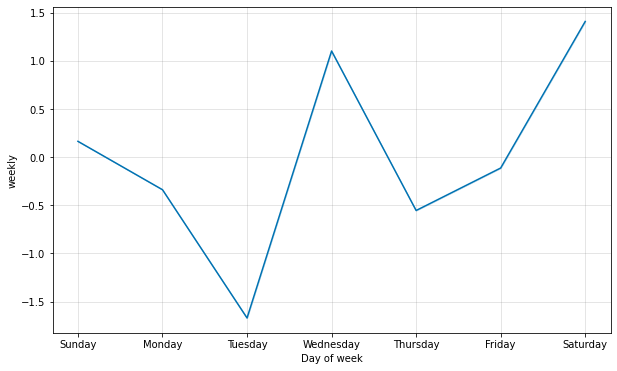

In [93]:
from fbprophet.plot import plot_weekly
plot_weekly(model)